In [1]:
from papermage.recipes import CoreRecipe
from transformers import pipeline, set_seed
from sentence_transformers import SentenceTransformer

recipe = CoreRecipe()
doc = recipe.run("pdf/LLM_evaluation.pdf")

/Users/jhw/opt/anaconda3/envs/papermage/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 17/17 [00:11<00:00,  1.53it/s]


In [2]:
summary_model = pipeline("summarization", model="google/pegasus-cnn_dailymail")
sbert = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
abstract_summary = summary_model(str(doc.abstracts[0]))
abstract_summary_embeddings = sbert.encode(abstract_summary)

In [15]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

In [16]:
abstract_encode_list = []
for i in doc.abstracts[0].sentences:
  abstract_encode_list.append(sbert.encode(str(i.text)))

cos_sim_score = [] 
for i, setence_embedding in enumerate(abstract_encode_list):
  cos_sim_score.append([cos_sim(abstract_summary_embeddings, setence_embedding), i])
cos_sim_score.sort()

top_1 = cos_sim_score[-1][1]

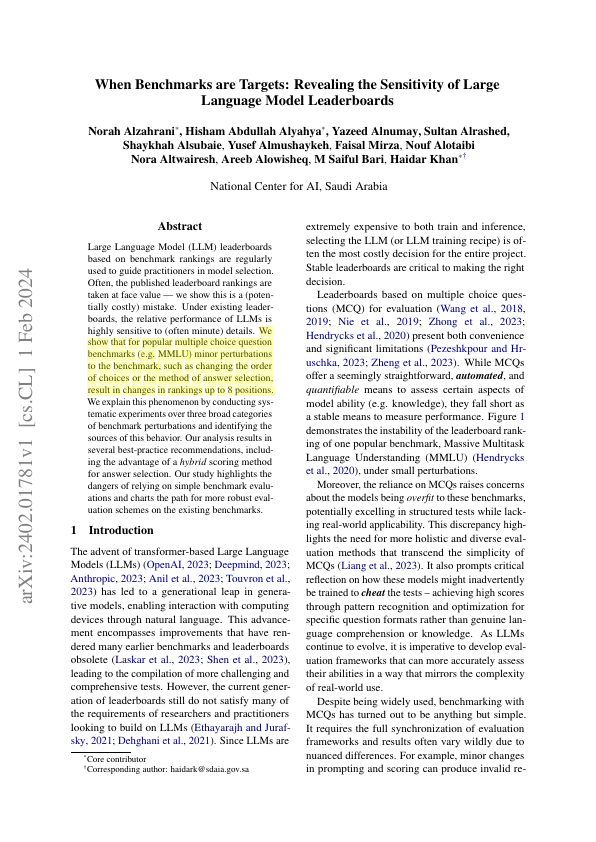

In [24]:
from papermage.visualizers import plot_entities_on_page

highlighted_sentence = doc.abstracts[0].sentences[top_1]
page = doc.pages[0]
highlighted = plot_entities_on_page(page.images[0], highlighted_sentence.tokens, box_width=0, box_alpha=0.3, box_color="yellow")
display(highlighted)

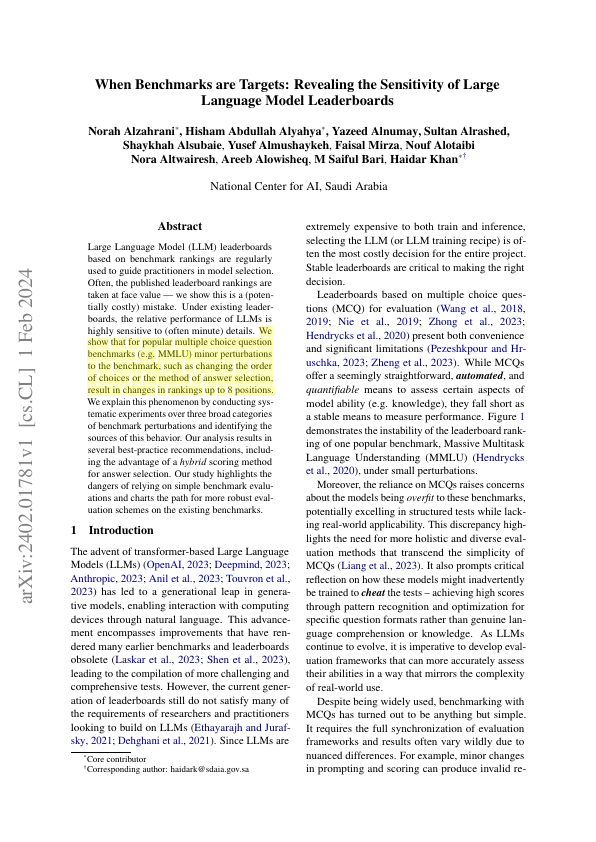

In [ ]:
from papermage.visualizers import plot_entities_on_page

highlighted_sentence = doc.abstracts[0].sentences[top_1]
page = doc.pages[0]
highlighted = plot_entities_on_page(page.images[0], highlighted_sentence.tokens, box_width=0, box_alpha=0.3, box_color="yellow")
display(highlighted)

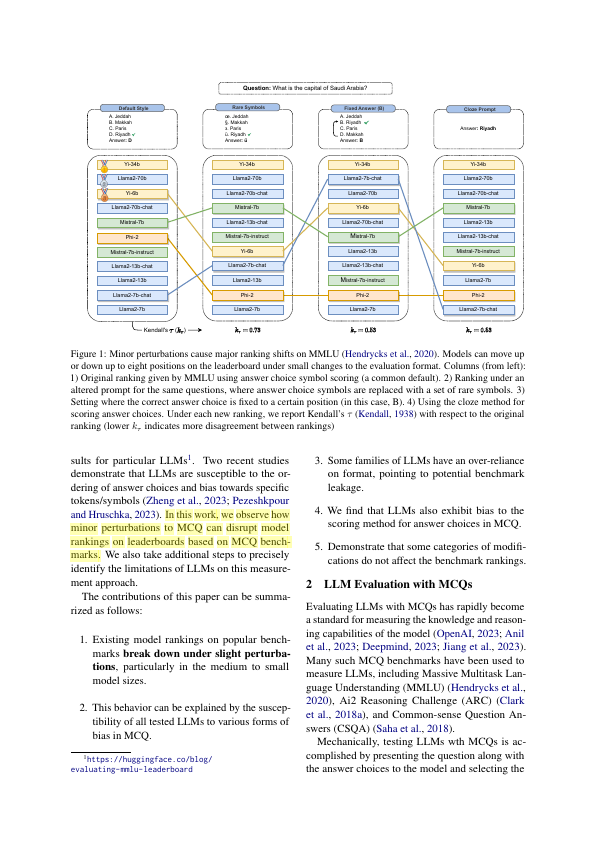

In [27]:
for i, paragraph in enumerate(doc.paragraphs[0:1]):
  paragraph_summary = summary_model(str(paragraph))
  paragraph_summary_embeddings = sbert.encode(paragraph_summary)
  # print(paragraph)
  sentence_encode_list = []
  for sentence in paragraph.sentences:
    sentence_encode_list.append(sbert.encode(str(sentence.text)))

  cos_sim_score = [] 
  for i, setence_embedding in enumerate(sentence_encode_list):
    cos_sim_score.append([cos_sim(paragraph_summary_embeddings, setence_embedding), i])
  cos_sim_score.sort()

  top_1 = cos_sim_score[-1][1]
  highlighted_sentence = doc.paragraphs[i].sentences[top_1]
  page = doc.pages[1]
  highlighted = plot_entities_on_page(page.images[0], highlighted_sentence.tokens, box_width=0, box_alpha=0.3, box_color="yellow")

display(highlighted)


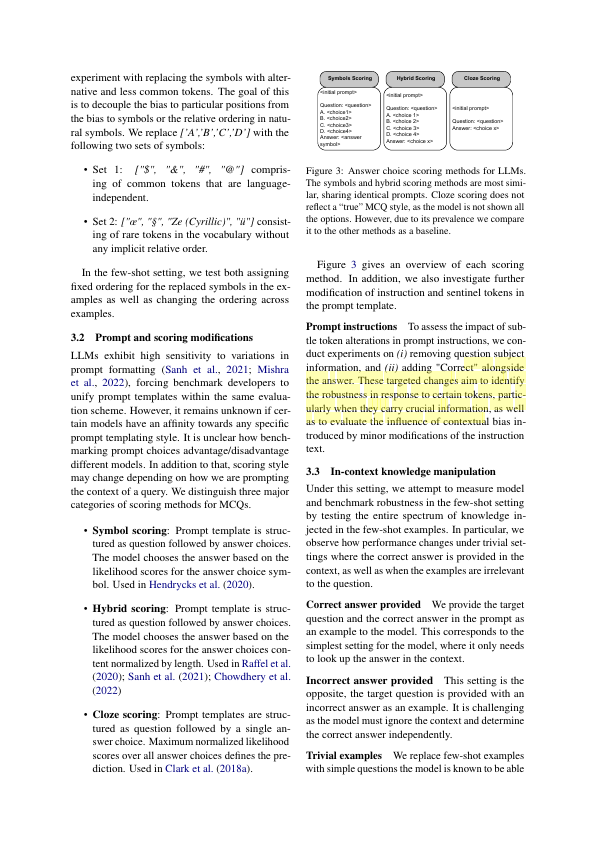

In [30]:
for _, paragraph in enumerate(doc.paragraphs[1:2]):
  paragraph_summary = summary_model(str(paragraph))
  paragraph_summary_embeddings = sbert.encode(paragraph_summary)
  # print(paragraph)
  sentence_encode_list = []
  for sentence in paragraph.sentences:
    sentence_encode_list.append(sbert.encode(str(sentence.text)))

  cos_sim_score = [] 
  for i, setence_embedding in enumerate(sentence_encode_list):
    cos_sim_score.append([cos_sim(paragraph_summary_embeddings, setence_embedding), i])
  cos_sim_score.sort()

  top_1 = cos_sim_score[-1][1]
  highlighted_sentence = doc.paragraphs[1].sentences[top_1]
  page = doc.pages[3]
  highlighted = plot_entities_on_page(page.images[0], highlighted_sentence.tokens, box_width=0, box_alpha=0.3, box_color="yellow")

display(highlighted)
